<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Green_Belt/3-Analyse/Exercicios/Lista_5/02.agencia_aviacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2) A agência de aviação de um país monitora voos de duas companhias aéreas para avaliar qual delas é melhor.

Critério: atraso (mais de 15 minutos do previsto). Foram 5 voos por dia, durante 20 dias, por companhia.

Os dados estão na planilha **Green_Belt_FM2S_Lista_Exercícios_05**, aba **02.Cia_Aérea**.

| **Coluna da Worksheet** | **Descrição** |
|--------------------------|---------------|
| **Dia**       | Dia do voo. |
| **Cia**       | Companhia aérea responsável pelo voo. |
| **Atrasado?** | Sim ou Não. |

---

**Responda:**

**a)** No geral, podemos ver diferenças entre a porcentagem de atraso para cada cia?  
Faça o Gráfico de Frequência mais apropriado para os dados.

**b)** Como está o comportamento da porcentagem ao longo do tempo? Existem causas especiais?

**c)** As causas especiais acontecem isoladamente para alguma Cia?

**d)** O que deveríamos esperar de cada uma delas?


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [9]:
file_path = '/content/[FM2S] Lista_Exercícios_5.xlsx'
sheet_name = '02.Cia_Aérea'
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [10]:
print("\nPrimeiras linhas:")
print(df.head())

print("\nEstatísticas descritivas:")
print(df.describe())

print("\nInformações dos dados:")
print(df.info())



Primeiras linhas:
   Dia Cia Atrasado?
0    1   A         N
1    1   A         N
2    1   A         N
3    1   A         S
4    1   A         N

Estatísticas descritivas:
              Dia
count  200.000000
mean    10.500000
std      5.780751
min      1.000000
25%      5.750000
50%     10.500000
75%     15.250000
max     20.000000

Informações dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Dia        200 non-null    int64 
 1   Cia        200 non-null    object
 2   Atrasado?  200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB
None


TypeError: agg function failed [how->mean,dtype->object]

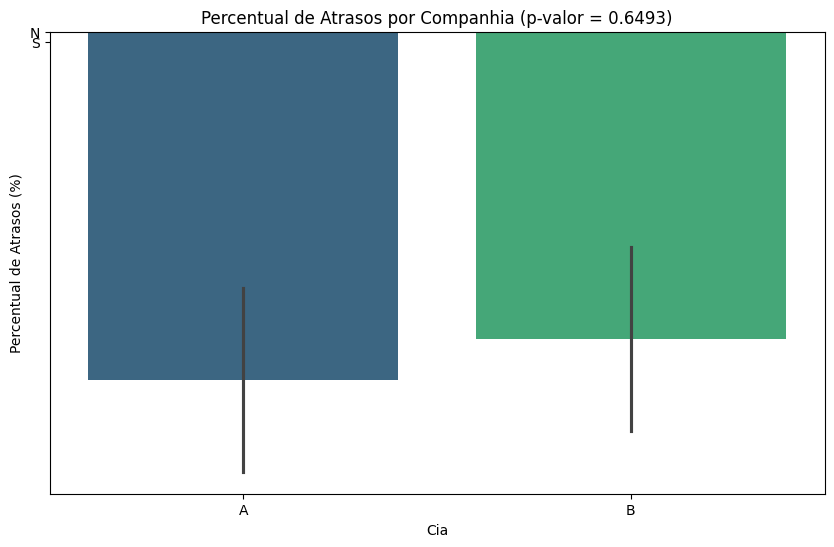

In [14]:
# Gráfico de percentual de atrasos por companhia
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Cia', y='Atrasado?', data=df,
    estimator=lambda x: x.mean() * 100,
    errorbar=('ci', 95), palette='viridis',hue='Cia',  order=['A', 'B']
)

# Teste qui-quadrado
contingency = pd.crosstab(df['Cia'], df['Atrasado?'])
chi2, p_valor, _, _ = chi2_contingency(contingency)

# Título com p-valor
ax.set_title(f'Percentual de Atrasos por Companhia (p-valor = {p_valor:.4f})')
ax.set_ylabel('Percentual de Atrasos (%)')

# Anotação de significância estatística
y_max = df.groupby('Cia')['Atrasado?'].mean().max() * 100 + 5
if p_valor < 0.05:
    ax.text(0.5, y_max, "Diferença significativa", ha='center',
            bbox=dict(facecolor='white', alpha=0.8))

plt.show()


In [12]:
# Média de atrasos por dia e companhia
df_dia = df.groupby(['Dia', 'Cia'])['Atrasado?'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='Dia', y='Atrasado?', hue='Cia', data=df_dia,
             marker='o', palette='tab10')

# Média geral
media = df_dia['Atrasado?'].mean()
desvio = df_dia['Atrasado?'].std()

# Linha central e limites de controle
plt.axhline(y=media, color='r', linestyle='--', label='Média Geral')
plt.fill_between(df_dia['Dia'], media + 3*desvio, media - 3*desvio,
                 color='gray', alpha=0.2, label='Limites 3σ')

plt.title('Gráfico de Controle de Atrasos ao Longo do Tempo')
plt.ylabel('Proporção de Atrasos')
plt.xlabel('Dia')
plt.legend(title='Companhia')
plt.tight_layout()
plt.show()


TypeError: agg function failed [how->mean,dtype->object]